# A/B Testing Analysis
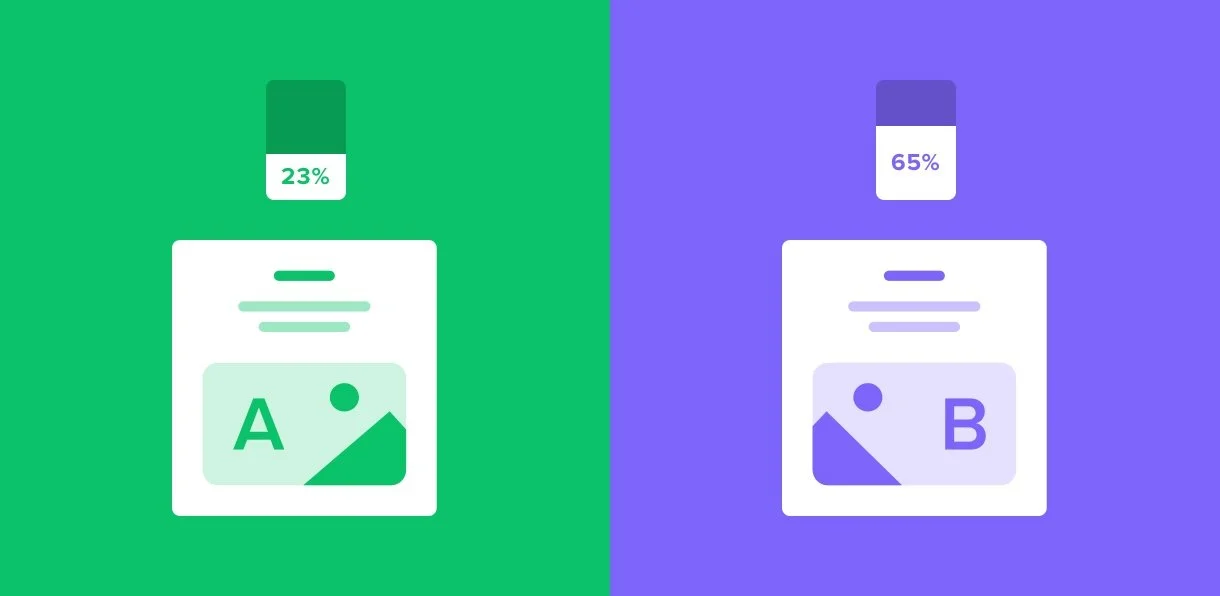

# OVERVIEW
# Business objective

The company is trying new ad design to increase ad success.
To do so they made new creative advertising design with SmartAd brand and performed an A/B test in which one group of users have been shown an old ad and another - new one.

# Experiment Approach

Our goal is to analyse the results of A/B test and figure out wherever new disign of ad affects the behavior of users in terms of responding to BIO questionnaire.

*  **Null Hypothesis Hₒ:** p = pₒ - There is no significant difference between the ad success rate of both groups
 
* **Alternative Hypothesis Hₐ:** p ≠ pₒ - There is significant difference between the ad success rate of both groups. Given we don’t know if the new design will perform better/worse/equal as our current design, we will perform a two-tailed test

* **Confidence Level:** 95% (α=0.05)

* **p** and **pₒ** stand for the conversion rate of the new and old design.


# Data description

Input data - csv file with following columns:

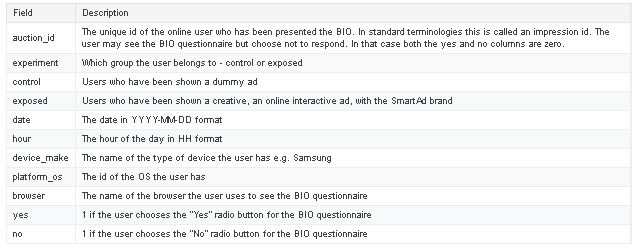


In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from wordcloud import WordCloud
%matplotlib inline

In [2]:
input_file = '/kaggle/input/ad-ab-testing/AdSmartABdata - AdSmartABdata.csv'

In [3]:
df = pd.read_csv(input_file)

In [4]:
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [5]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [6]:
df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [8]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [9]:
df.isnull()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
8072,False,False,False,False,False,False,False,False,False
8073,False,False,False,False,False,False,False,False,False
8074,False,False,False,False,False,False,False,False,False
8075,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [11]:
df.shape

(8077, 9)

In [12]:
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [13]:
# Set up the format and styles for plots globally
sns.set_style('white')
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('font', size=10)

In [14]:
num_duplicates = sum(df.duplicated(subset=['auction_id']))

print(f'Amount of duplicates: {num_duplicates}')

Amount of duplicates: 0


In [15]:
def get_response(row):
    '''
    Create response column with ecnoded response values
    :param row: list of ['yes', 'no'] columns of pandas dataframe
    
    '''
    
    if row[0] == 1:
        res = 'yes'
    elif row[1] == 1:
        res = 'no'
    else:
        res = 'no response'
        
    return res

In [16]:
def get_category_percent(row, decimal=1):
    '''
    Get percent of value distributed amoung colums
    :param row: list of columns from pandas dataframe
    '''
    
    return round(row/max(row)*100, decimal)

/tmp/ipykernel_18/2475865327.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == 1:
/tmp/ipykernel_18/2475865327.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif row[1] == 1:
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

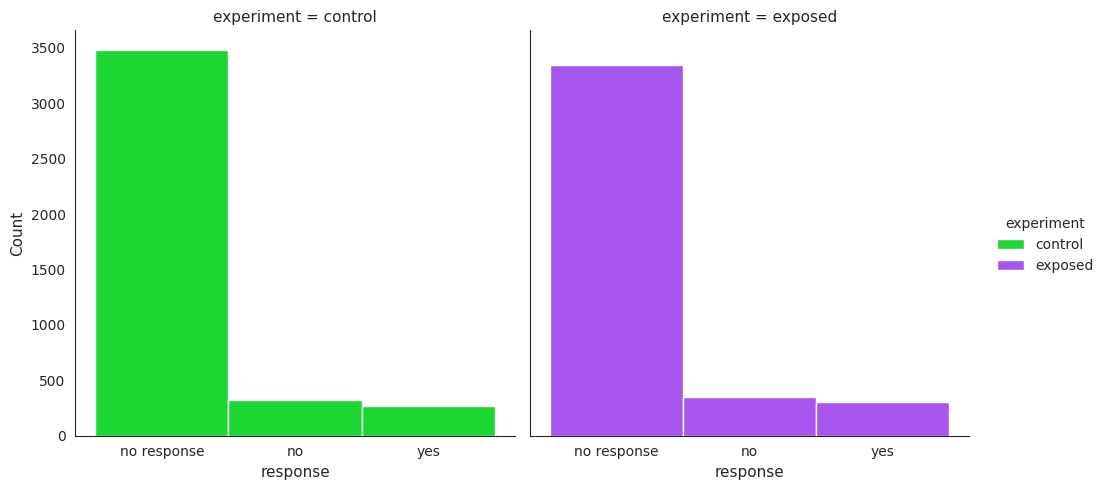

response %,yes,no,no response
experiment,,,
control,6.5,7.9,85.6
exposed,7.7,8.7,83.6


In [17]:
df['response'] = df[['yes', 'no']].apply(get_response, axis=1)

sns.displot(df.sort_values(by='experiment'), x='response', 
            col='experiment', hue='experiment', 
            palette=['#1CD631','#A757EE'], alpha=1)

plt.show()

df_response = pd.pivot_table(data=df, index='experiment', columns='response', aggfunc='count')['auction_id']

df_response['total'] = df_response.apply(sum, axis=1)

df_response = df_response.apply(get_category_percent, axis=1)

df_response.columns.name = 'response %'

df_response = df_response[['yes', 'no', 'no response']]

display(df_response)

In [18]:
df = df[(df['yes'] == 1) | (df['no'] == 1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 2 to 8071
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   1243 non-null   object
 1   experiment   1243 non-null   object
 2   date         1243 non-null   object
 3   hour         1243 non-null   int64 
 4   device_make  1243 non-null   object
 5   platform_os  1243 non-null   int64 
 6   browser      1243 non-null   object
 7   yes          1243 non-null   int64 
 8   no           1243 non-null   int64 
 9   response     1243 non-null   object
dtypes: int64(4), object(6)
memory usage: 106.8+ KB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


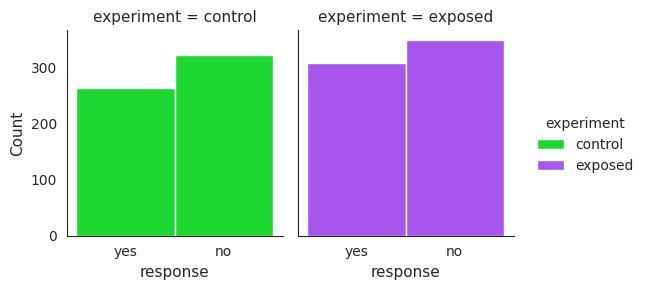

response %,yes,no
experiment,,
control,45.1,54.9
exposed,46.9,53.1


In [19]:
sns.displot(df.sort_values(by='experiment'), x='response', 
            col='experiment', hue='experiment', 
            palette=['#1CD631','#A757EE'], alpha=1, height=3, aspect=0.9)

plt.show()

df_response = pd.pivot_table(data=df, index='experiment', columns='response', aggfunc='count')['auction_id']

df_response['total'] = df_response.apply(sum, axis=1)

df_response = df_response.apply(get_category_percent, axis=1)

df_response.columns.name = 'response %'

df_response = df_response[['yes', 'no']]

display(df_response)

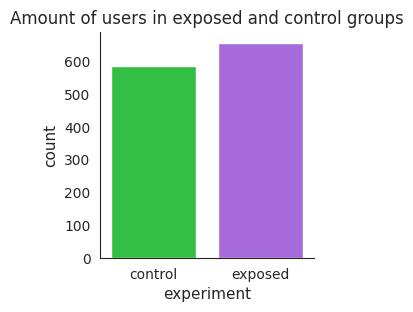

Percent of users in control group: 47.1%
Percent of users in exposed group: 52.9%


In [20]:
sns.catplot(data=df.sort_values(by='experiment'), x='experiment', 
            kind='count', height=3, palette=['#1CD631','#A757EE'])\
            .set(title='Amount of users in exposed and control groups')
plt.show()

print('Percent of users in control group: {:.1%}'\
      .format(len(df[df['experiment']=='control'])/len(df)))
print('Percent of users in exposed group: {:.1%}'\
      .format(len(df[df['experiment']=='exposed'])/len(df)))

In [21]:
print('First date of experiment: {}'.format(df['date'].min()))
print('Last date of experiment:  {}'.format(df['date'].max()))

First date of experiment: 2020-07-03
Last date of experiment:  2020-07-10


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

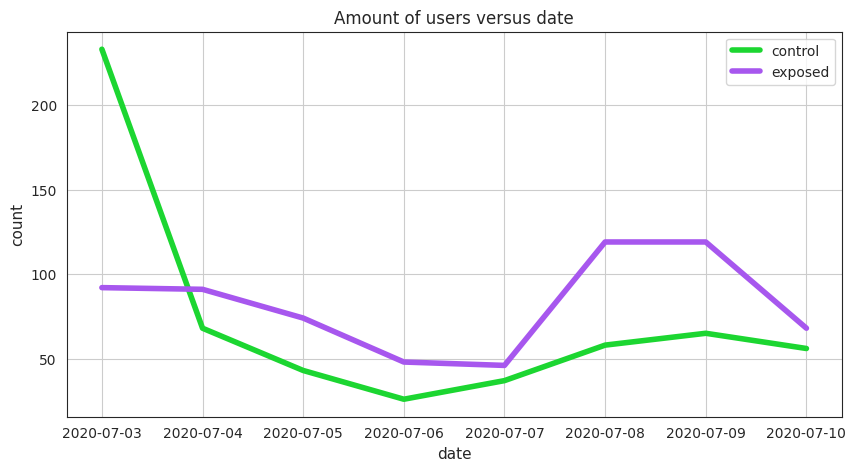

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

g = sns.lineplot(data=df.groupby(['experiment', 'date'])['date'].count()['control'], 
                ax=ax, label='control', color='#1CD631', linewidth = 4)
g = sns.lineplot(data=df.groupby(['experiment', 'date'])['date'].count()['exposed'], 
                ax=ax, label='exposed', color='#A757EE', linewidth = 4)

ax.grid(True)
ax.set_ylabel('count')
ax.set_title('Amount of users versus date')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


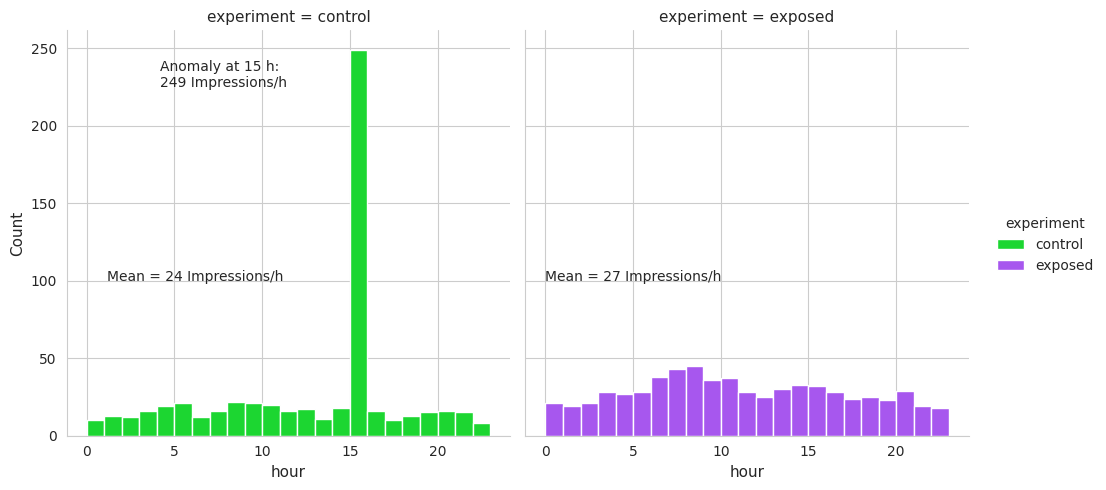

In [23]:
sns.set_style("whitegrid")

sns.displot(df.sort_values(by='experiment'), x='hour', col='experiment', 
            bins=range(24), hue='experiment', 
            palette=['#1CD631','#A757EE'], alpha=1)

plt.text(-25, 100, "Mean = {:.0f} Impressions/h"\
         .format(df[df['experiment']=='control']\
                 .groupby('hour')['experiment'].count().mean()))

plt.text(-22, 225, "Anomaly at 15 h:\n{:.0f} Impressions/h"\
         .format(df[df['experiment']=='control']\
                 .groupby('hour')['experiment'].count().max()))

plt.text(0, 100, "Mean = {:.0f} Impressions/h"\
         .format(df[df['experiment']=='exposed']\
                 .groupby('hour')['experiment'].count().mean()))


plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


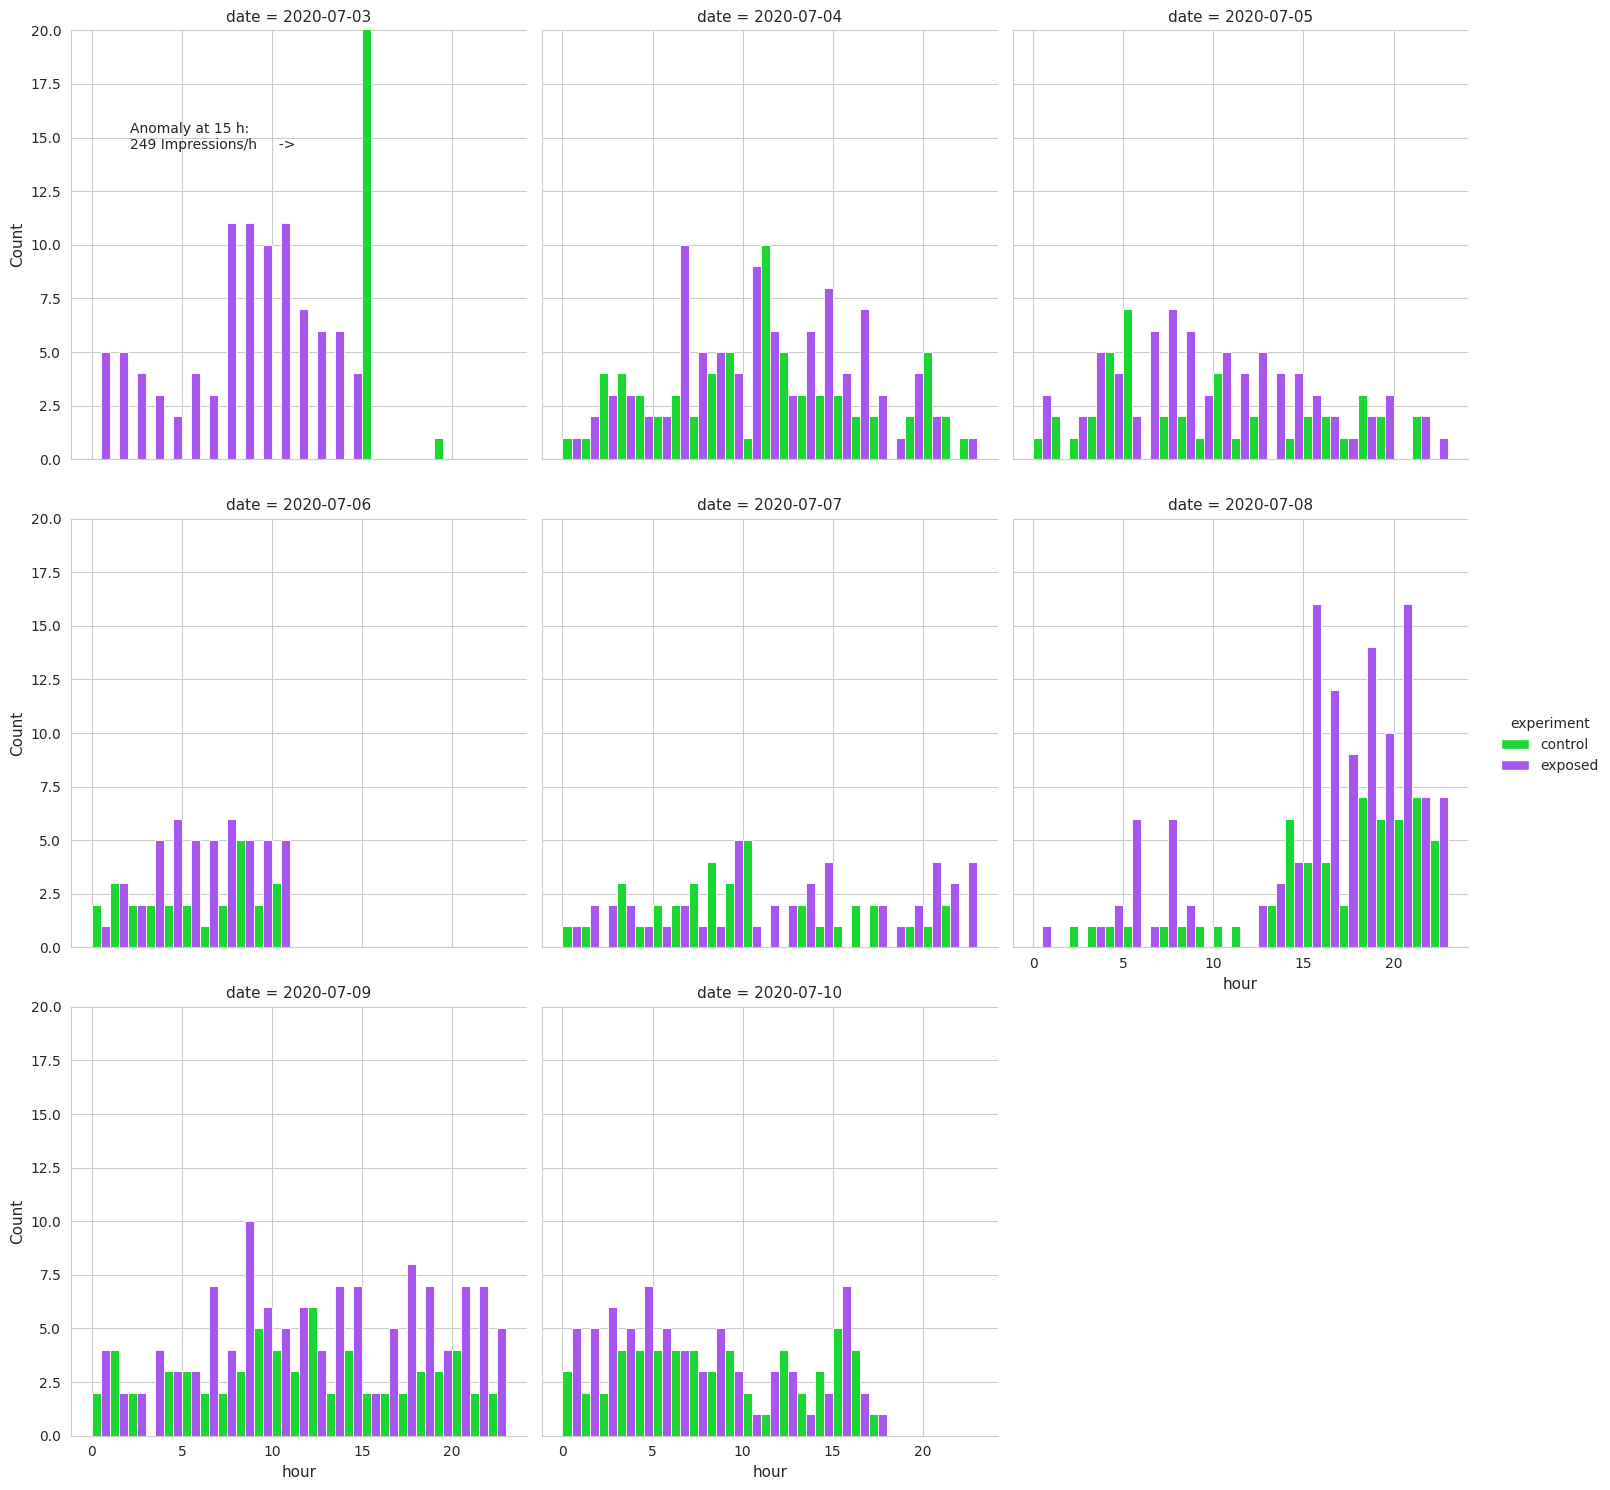

In [24]:
sns.set_style("whitegrid")

sns.displot(df.sort_values(by=['date','experiment']), x='hour', col='date', bins=range(24), 
            hue='experiment', palette=['#1CD631','#A757EE'], alpha=1,
            multiple="dodge", col_wrap=3, facet_kws=dict(sharey=True))
plt.ylim([0, 20])

plt.text(-24, 60, "Anomaly at 15 h:\n{:.0f} Impressions/h     ->"\
         .format(df[df['experiment']=='control']\
                 .groupby('hour')['experiment'].count().max()))
plt.show()